In [7]:
import string
import matplotlib.pyplot as plt
import numpy as np
import sys
import os

sequential = "Sequential.txt"
results_dir = "Results\\"

##########------------------     Append all txts from current Directory and extract sequential speed  ------------------##########
#Get the resulting txts from current directory
txts = [f for f in os.listdir('Results') if f.endswith('.txt')]

seqTime = float()
ntrials = sys.argv[1]

if sequential in txts:
    with open(results_dir+sequential,"r") as file:
        listoflines = file.readlines()
        seqTime = float(listoflines[2].split(" ")[len(listoflines[2].split(" ")) -2])
        file.close()
    txts.remove(sequential)
else : 
    print("Sequential results file not found...")
    exit(1)

In [8]:
##########------------------  Initialize ThreadCount   ------------------##########
#threadCount must be a set of the number of threads used 
threadCount = set()
for each in txts:
    threadCount.add(int(each.split("_")[1].split(".")[0]))
threadCount = list(sorted(threadCount))

In [9]:
##########------------------  Initialize InputResults   ------------------##########
# inputResults will be the created dataframe
# The second line of each txt should end with #(elapsedTime) s

inputResults = []

for each in txts:
    found = False
    splittedFile = each.split(".")[0].split("_") + txts[0].split("_")[1].split(".")[1].split(" ")
    #out is each list of inputResults
    for out in inputResults:
        if splittedFile[0] == out[0]:
            found = True
            index = threadCount.index(int(splittedFile[1]))
                        
            with open(results_dir + each,"r") as file:
                listoflines = file.readlines()
                out[index+1] = seqTime/float(listoflines[2].split(" ")[len(listoflines[2].split(" ")) -2])
            file.close()
            break
    if found is False :
        #file will be a list created for each file in txts and appended to inputResults
        inp = [0]*(len(threadCount)+1)
        inp[0]= splittedFile[0]
        index = threadCount.index(int(splittedFile[1]))
 
        with open(results_dir + each,"r") as file:
                listoflines = file.readlines()
                inp[index+1] = seqTime/float(listoflines[2].split(" ")[len(listoflines[2].split(" ")) -2])
                file.close()
        inputResults.append(inp)

In [11]:
def plotResults(idealDiag, inputlines, label):
    ##########------------------     Linestyles, colors and markers   ------------------##########
    #3 available line formats 
    linestyle_tuple = [
        ('loosely dashed',        (0, (5, 10))),   #for the ideal lines
        ('straight line',              'solid'),                   
        ('densely dashdotted',    (0, (3, 1, 1, 1))),          
        ('densely dashed',        (0, (5, 1))),                   
        ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1))),
    ]
        

    #8 available line colors
    mycolors = ["lightcoral","olive","seagreen","turquoise","steelblue","orchid","indigo","teal"]
    #4 available markers
    mymarkers = [ "o", "d", ">", "<"]

    ##########------------------     Create the plot    ------------------##########
        
    plt.rcParams['figure.figsize'] = [10, 14]
    plt.style.use("fivethirtyeight")
    fig, (ax1, ax2 ) = plt.subplots(2) #create a figure containing a single axes

    # Add labels-title of ax1
    ax1.set_title("Speedup for strong scaling {0}".format(label))
    ax1.set_ylabel("Speedup")
    ax1.set_xlabel("# threads-cores")
    ax1.set_ylim( 0, idealDiag[len(idealDiag)-1])
    ax1.set_xticks(idealDiag)
    yaxis = np.linspace(idealDiag[0],idealDiag[len(idealDiag)-1],2*len(idealDiag)).round(0)
    ax1.set_yticks(yaxis)

    #create minor ticks for axis 1
    minor_yticks = []
    y= yaxis[0]
    for x in yaxis[1:]:
        minor_yticks.append((x+y)/2)
        y = x
    ax1.set_yticks( minor_yticks, minor= True )

    # Add lables-title of ax2
    yaxis = np.linspace(0.5,1.05,2*len(idealDiag)).round(2)
    ax2.set_title("Efficiency for strong scaling {0}".format(label))
    ax2.set_ylabel("Efficiency")
    ax2.set_xlabel("# threads-cores")
    ax2.set_ylim( yaxis[0], yaxis[len(yaxis)-1])
    ax2.set_xticks(idealDiag)
    ax2.set_yticks(yaxis)

    # Plotting ideal lines
    ax1.plot(idealDiag, idealDiag, linewidth = 0.8, linestyle = linestyle_tuple[0][1], color= "grey", alpha=0.5 )
    ax2.plot([ idealDiag[0],idealDiag[len(idealDiag)-1]],[1,1],linewidth = 0.8, linestyle= linestyle_tuple[0][1], color= "grey", alpha=0.5 )

    ##########------------------     Plot the input     ------------------##########

    # x is a tuple where x[0] is the index and x[1] is the list
    for x in enumerate(inputlines):
        ax1.plot(idealDiag, x[1][1:], linewidth= 0.8, marker='.', markerfacecolor = mycolors[ x[0] % len(mycolors) ],label= x[1][0], linestyle = "solid", color =  mycolors[ x[0] % len(mycolors) ])
            
        efficList = []
        #y is a tuple where y[0] is the index of the list and y[1] each element of the list
        for y in enumerate(x[1][1:]):
            efficList.append( y[1] / idealDiag[y[0]])

        ax2.plot(idealDiag, efficList, linewidth= 1.5, marker= mymarkers[x[0] % len(mymarkers)], markerfacecolor = mycolors[ x[0] % len(mycolors) ], label= x[1][0], linestyle = linestyle_tuple[ (x[0]+1) % len(linestyle_tuple) ][1], color =  mycolors[ x[0] % len(mycolors) ])

    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")

    #save the image to your working directory
    # plt.savefig("Speedup and Efficiency -{0} Trials -{1} Threads -{2} Aggresion Scale.png".format(sys.argv[1],sys.argv[2],sys.argv[3]))
    # plt.clf()

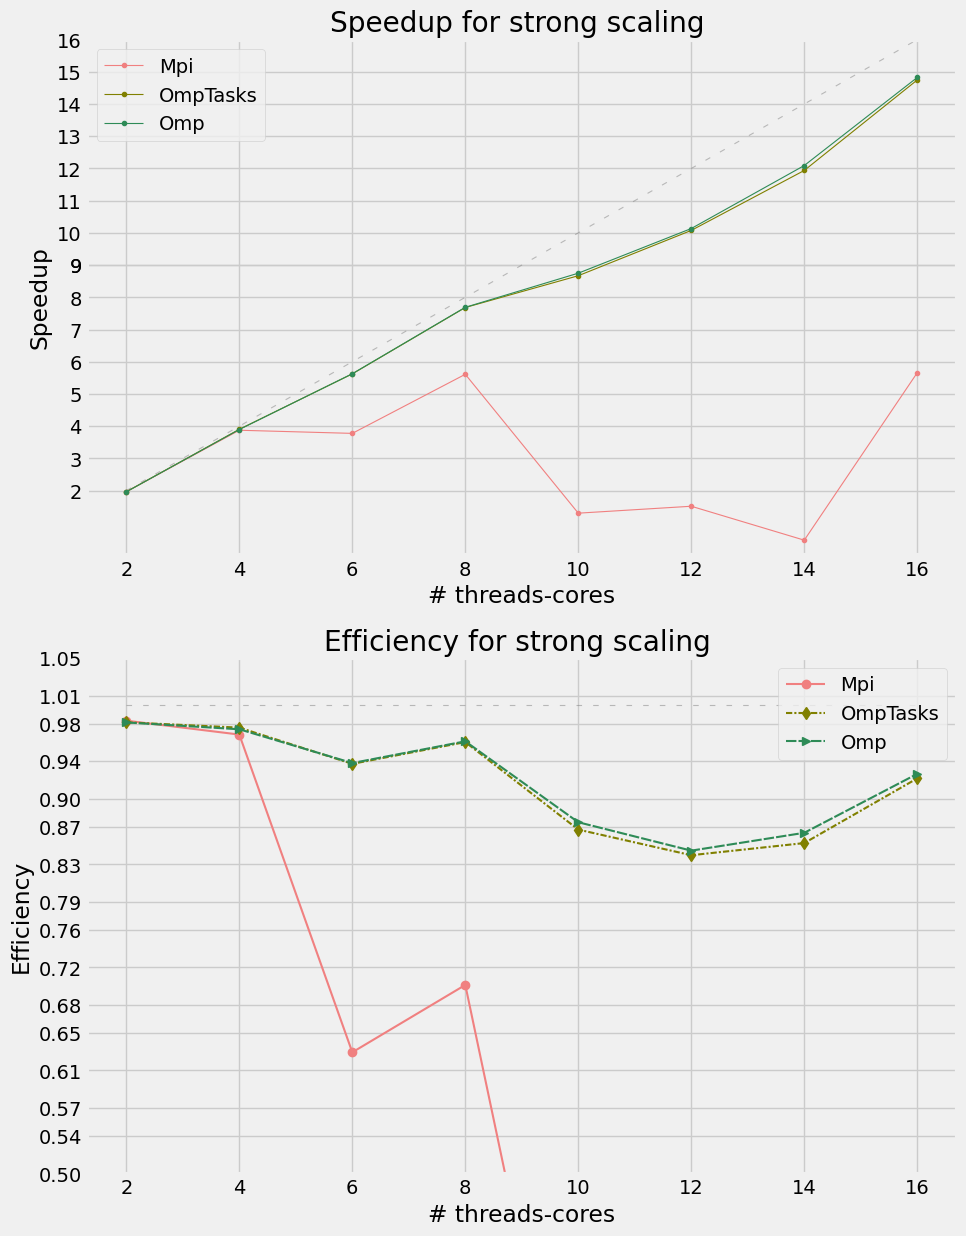

In [12]:
label =  " - " + str(ntrials) + " trials"
plotResults(threadCount,inputResults, "")